In [1]:
# Nebula_FinalNotebook

In [2]:
# Imports
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
# Load & Preprocess dataset

def load_images(path, classes):
    X = []
    Y = []
    for cls in classes:
        pth = os.path.join(path, cls)
        class_idx = classes[cls]
        loaded_images = 0  
        for j in os.listdir(pth):
            img = cv2.imread(os.path.join(pth, j), 0)
            img = cv2.resize(img, (250, 250))
            X.append(img)
            Y.append(class_idx)
            loaded_images += 1 
        #print nb of loaded images from folders
        print(f"Loaded {loaded_images} images from {cls} folder")
    return np.array(X), np.array(Y)

#Class Labels
classes = {'no_tumor': 0, 'category1_tumor': 1, 'category2_tumor': 2, 'category3_tumor': 3}

X, Y = load_images('Datathon-Dataset', classes)

Loaded 490 images from no_tumor folder
Loaded 916 images from category1_tumor folder
Loaded 927 images from category2_tumor folder
Loaded 891 images from category3_tumor folder


In [4]:
# Reshape images

#200 height,width
X = X.reshape(X.shape[0], 250, 250, 1)

#normalize pixel values(model Perform better)
X = X / 255.0

#split the images into 80% for training and 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)

In [5]:
# Build and Complile the DNN model

model = Sequential([
    #add the first convolutional layer to the model.32 filters of size 3x3, 
    Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 1)),
    #add a max-pooling layer with a pool size of 2x2. to reduce spatial dimensions of output from previous layer
    MaxPooling2D(2, 2),
    
    #convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    #max-pooling layer to further reduce spatial dimensions.
    MaxPooling2D(2, 2),
    
    #convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    #Another max-pooling layer
    MaxPooling2D(2, 2),

    #convolutional layer with 256 filters 
    Conv2D(256, (3, 3), activation='relu'),
    #Another max-pooling layer
    MaxPooling2D(2, 2),
    
    #flattens the 2D output from the previous layer into a 1D vector.
    Flatten(),
    
    #dense layer with 128 neurons
    Dense(128, activation='relu'),
    #dropout layer to prevent overfitting
    Dropout(0.5),
    # final dense layer with 4 neurons(= nb of classes)
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#if exists load trained_model.h5. else train and save 
if os.path.exists('trained_model.h5'):
    model = tf.keras.models.load_model('trained_model.h5')
else:
    #training 20 epochs and save---
    model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))
    model.save('trained_model.h5')
    print("Trained model saved successfully.")

Epoch 1/20
81/81 [==============================] - 235s 3s/step - loss: 1.1658 - accuracy: 0.4773 - val_loss: 0.8685 - val_accuracy: 0.6248
Epoch 2/20
81/81 [==============================] - 279s 3s/step - loss: 0.8817 - accuracy: 0.6188 - val_loss: 0.7758 - val_accuracy: 0.6806
Epoch 3/20
81/81 [==============================] - 227s 3s/step - loss: 0.6888 - accuracy: 0.7115 - val_loss: 0.6026 - val_accuracy: 0.7566
Epoch 4/20
81/81 [==============================] - 158s 2s/step - loss: 0.5482 - accuracy: 0.7852 - val_loss: 0.5297 - val_accuracy: 0.8062
Epoch 5/20
81/81 [==============================] - 151s 2s/step - loss: 0.4558 - accuracy: 0.8162 - val_loss: 0.4507 - val_accuracy: 0.8434
Epoch 6/20
81/81 [==============================] - 127s 2s/step - loss: 0.3671 - accuracy: 0.8569 - val_loss: 0.4317 - val_accuracy: 0.8496
Epoch 7/20
81/81 [==============================] - 91s 1s/step - loss: 0.3226 - accuracy: 0.8705 - val_loss: 0.3682 - val_accuracy: 0.8806
Epoch 8/20
81/

C:\Users\SiCK_BoY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Trained model saved successfully.


In [6]:
# Performance of the Model Evaluation 

#test accuracy and loss after initial testing
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)
print("Test loss:", test_loss)

#Model Predictions
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
correct_predictions = np.sum(predicted_labels == y_test)

print("Number of images tested:", len(y_test))
print("Number of images predicted successfully:", correct_predictions)

21/21 [==============================] - 7s 344ms/step - loss: 0.4513 - accuracy: 0.9132
Test accuracy: 0.9131782650947571
Test loss: 0.4513011872768402
21/21 [==============================] - 8s 336ms/step
Number of images tested: 645
Number of images predicted successfully: 589


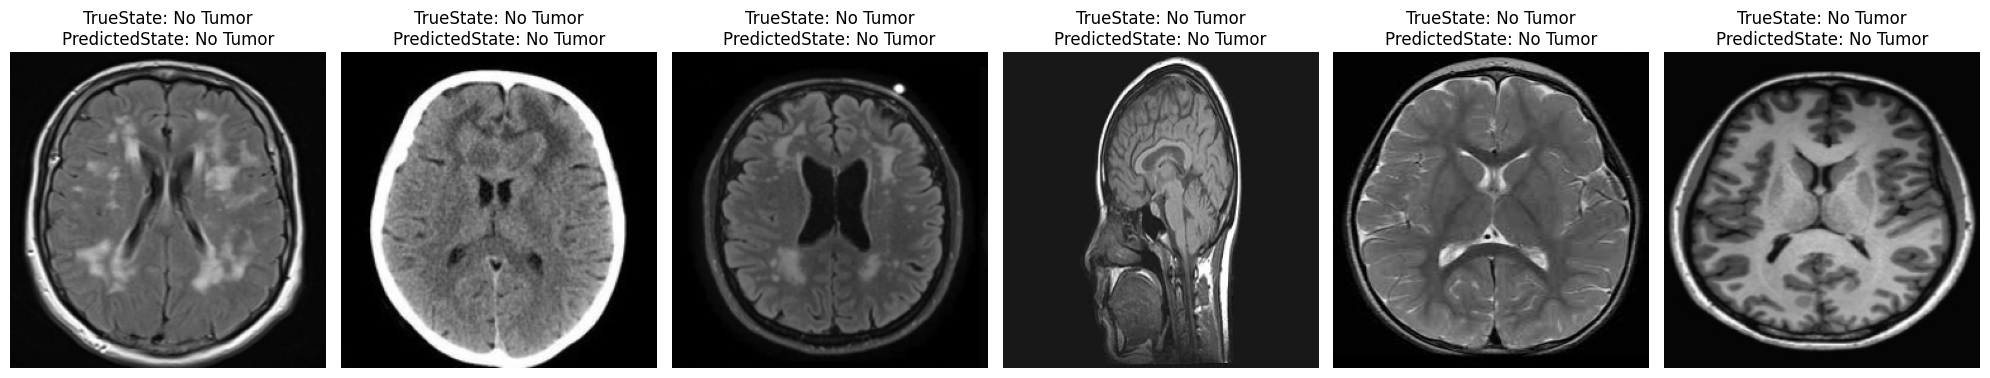

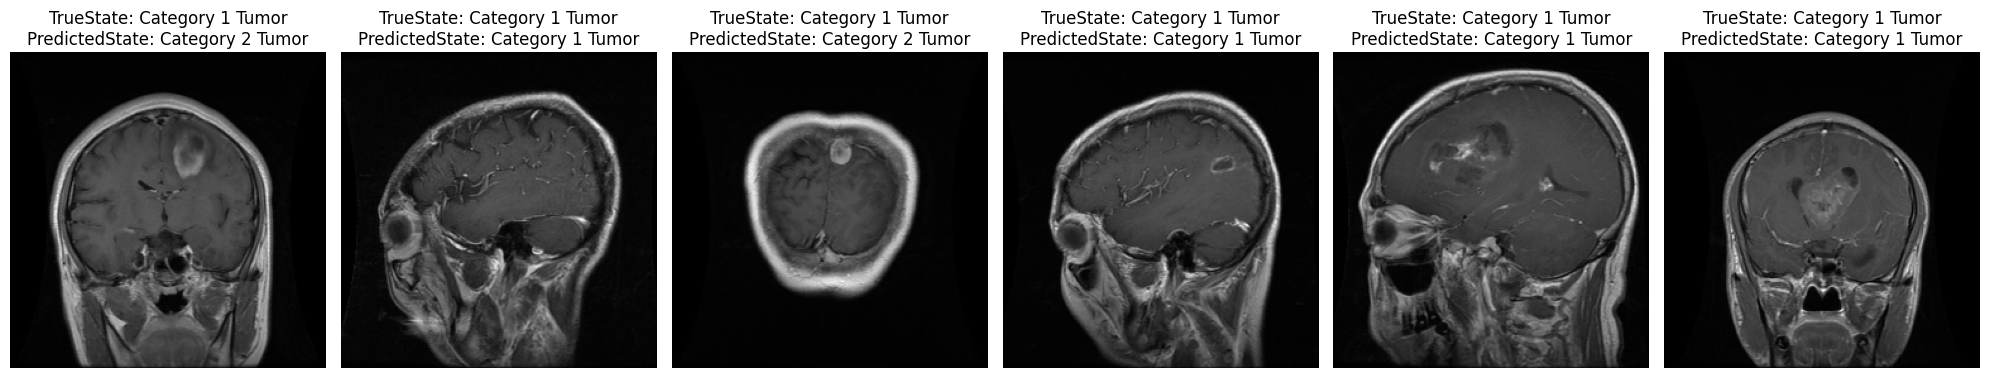

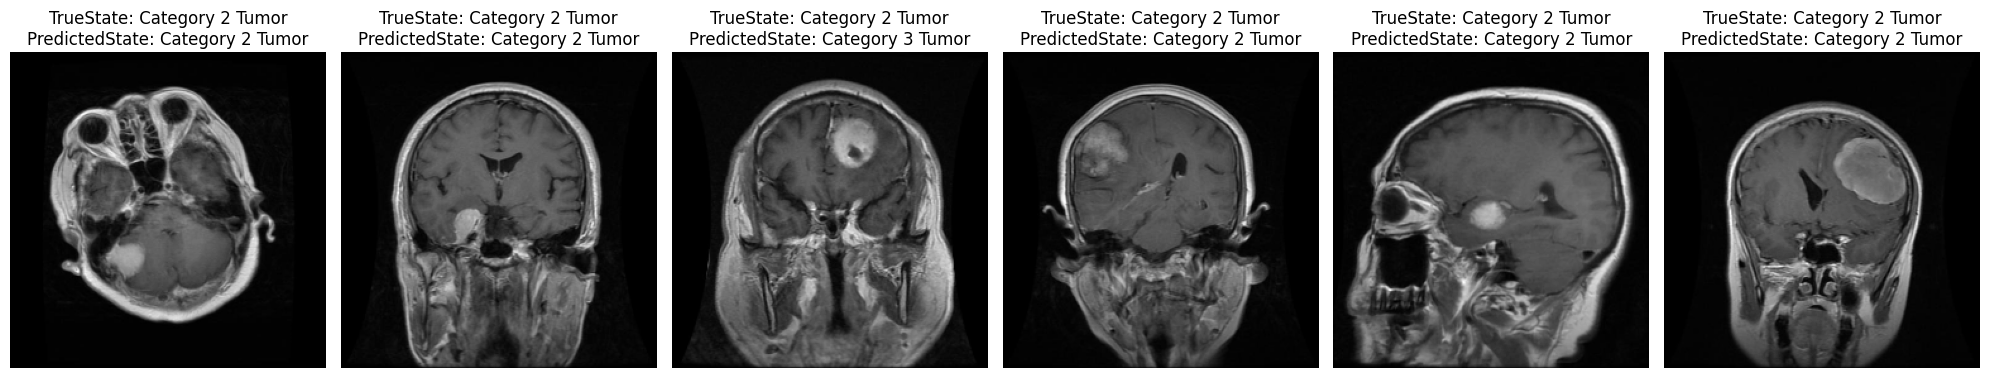

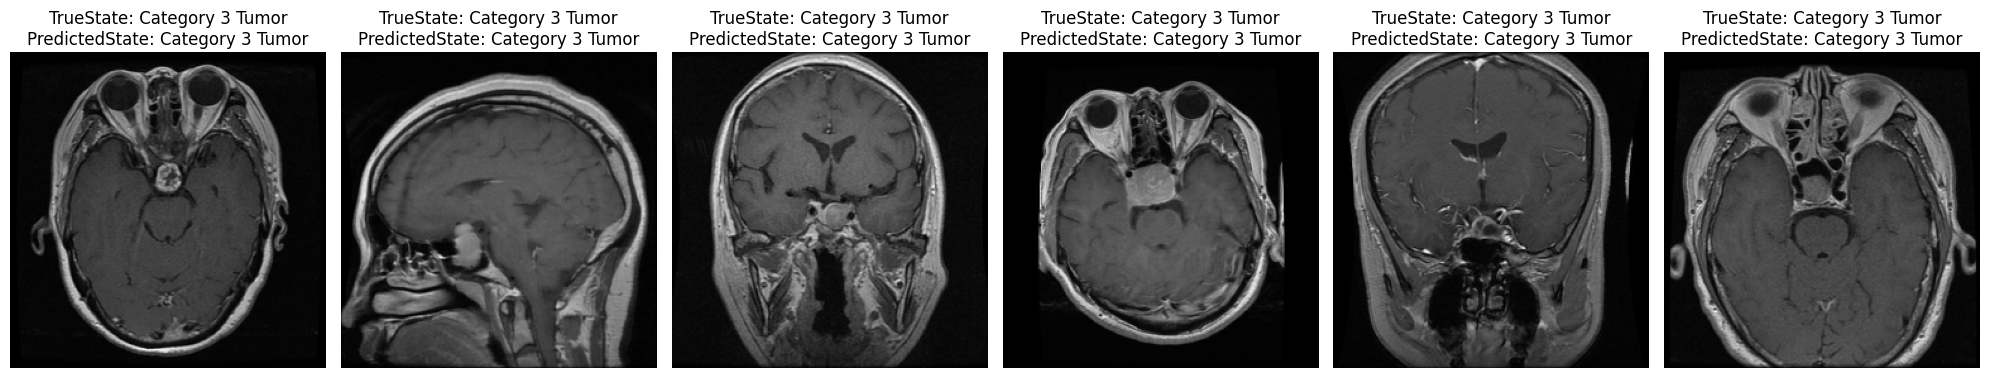

In [7]:
#data visualization

import random

class_names = {0: 'No Tumor', 1: 'Category 1 Tumor', 2: 'Category 2 Tumor', 3: 'Category 3 Tumor'}

def visualize_random_predictions(images, labels, predictions, class_name, classes, num_images=6):
    plt.figure(figsize=(20, 4))
    class_indices = [i for i, label in enumerate(labels) if label == class_name]
    selected_indices = random.sample(class_indices, num_images)
    
    for i, idx in enumerate(selected_indices, start=1):
        plt.subplot(1, num_images, i)
        plt.imshow(images[idx].squeeze(), cmap='gray')
        true_label = classes[labels[idx]]
        predicted_label = classes[predictions[idx]]
        plt.title(f"TrueState: {true_label}\nPredictedState: {predicted_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize random images from all 4 categories of tumor predictions
visualize_random_predictions(x_test, y_test, predicted_labels, 0, class_names)
visualize_random_predictions(x_test, y_test, predicted_labels, 1, class_names)
visualize_random_predictions(x_test, y_test, predicted_labels, 2, class_names)
visualize_random_predictions(x_test, y_test, predicted_labels, 3, class_names)
